In [ ]:
################### SCRAPPED https://compuscience.com.eg/en/11-laptop? for Laptops #########################
################### All Laptop Pages #####################
################### product : Name , Price , Link #########################
################### Saved in csv ############################
################### Simple Statistics Using Pandas Library : Min , Max , Avg  ####################
################### Simple Visualization using Matplotlib  ############################

In [2]:
from bs4 import BeautifulSoup
import requests
import csv
from itertools import zip_longest
from urllib.request import urlopen
import pandas as pd
import matplotlib.pyplot as plt

In [247]:
ProdName = []
ProdLink = []
ProdPrice = []

In [248]:
productslist =[]

In [249]:
################################## There was more than Product list in the page with the same div class name ##############
#######so to be specific i choose the used class name to get the main product list (the middle of the page) #######
######### Then ran a for loop to get the exact html Tags for Title , Link ,Price #############
for i in range(1,7):
    ############### Tried another way to requests I found in O'REILLY Book 'https://learning.oreilly.com/library/view/web-scraping-with/9781491985564/ch01.html#idm46279836664600' ##############
    html =urlopen('https://compuscience.com.eg/en/11-laptop'+"?page={}".format(i))
    bs = BeautifulSoup(html, 'lxml')
    productslist=bs.find_all("div",class_="products row cols-xs-1 cols-sm-2 cols-md-3 cols-lg-3 cols-xl-3")
    for j in range(len(productslist[0].find_all('h2'))):
        ProdName.append(productslist[0].find_all('h2')[j].text)
        ProdLink.append(productslist[0].find_all('h2')[j].a['href'])
############# slicing in [:-3].replace(",","") to remove 'EGP' and replacing comma to save in CSV and use price in pandas#############
        ProdPrice.append(productslist[0].find_all('span',{'class':'price'})[j].text[:-3].replace(",", ""))

In [251]:
file_list = [ProdName,ProdPrice,ProdLink]
exported = zip_longest(*file_list)
    

In [252]:
with open('laptops.csv','w',encoding="utf-8") as myfile:
    wr = csv.writer(myfile)
    wr.writerow(["Laptop Name","Price","Laptop Link"])
    wr.writerows(exported)

In [3]:
dflaptops = pd.read_csv('laptops.csv')

In [279]:
indexMin = dflaptops['Price'].idxmin()

In [282]:
indexMax = dflaptops['Price'].idxmax()

In [286]:
NameOfMin = dflaptops['Laptop Name'][indexMin]

In [288]:
NameOfMax = dflaptops['Laptop Name'][indexMax]

In [289]:
LinkOfMin = dflaptops['Laptop Link'][indexMin]

In [290]:
LinkOfMax = dflaptops['Laptop Link'][indexMax]

In [265]:
minPrice = dflaptops['Price'].min()

In [266]:
maxPrice = dflaptops['Price'].max()

In [270]:
avgPrice = dflaptops['Price'].mean()

In [293]:
############# saved Info of Min and Max items in Dictionaries ##############
MostExpensive = {"Name":NameOfMax,"Price":maxPrice,"Link":LinkOfMax}

In [294]:
Cheapest = {"Name":NameOfMin,"Price":minPrice,"Link":LinkOfMin}

In [295]:
MostExpensive

{'Name': 'ASUS ROG Flow X13 GV301QE-K5049T R9\xa05980H-16GB RAM-1TB SSD-RTX™\xa03050\xa0Ti 4GB-13.4 Inch-Win10',
 'Price': 59699,
 'Link': 'https://compuscience.com.eg/en/laptop/1756-asus-rog-flow-x13-gv301qe-k5049t-r9-5980h-16gb-ram-1tb-ssd-rtx-3050-ti-4gb-134-inch-win10.html'}

In [296]:
Cheapest

{'Name': 'Lenovo V15 AMD 3020U-4GB-1TB-AMD Radeon Graphics-15.6 HD-DOS',
 'Price': 5199,
 'Link': 'https://compuscience.com.eg/en/laptop/1922-lenovo-v15-amd-3020u-4gb-1tb-amd-radeon-graphics-156-hd-dos.html'}

In [267]:
minPrice

5199

In [268]:
maxPrice

59699

In [271]:
avgPrice

18154.718309859156

In [274]:
x = dflaptops['Laptop Name']
y = dflaptops['Price']

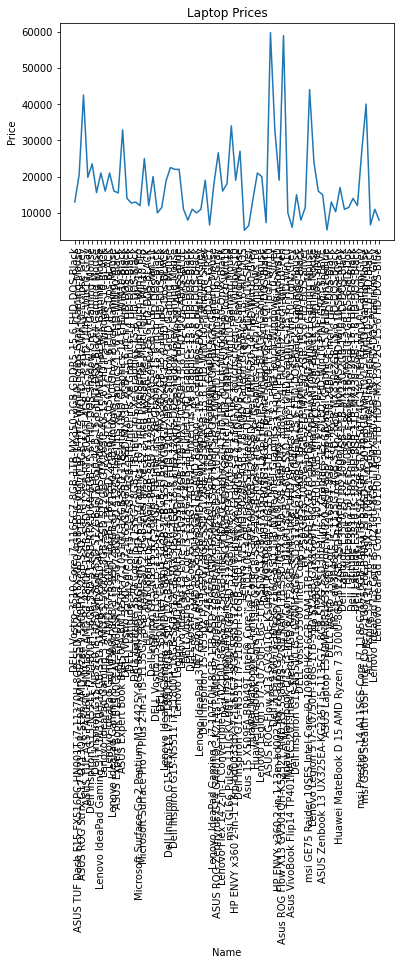

In [278]:
plt.title('Laptop Prices')
plt.xlabel('Name')
plt.ylabel('Price')
####### To visualize x Labels in Vertical way #############
plt.xticks(rotation='vertical')
plt.plot(x,y)
plt.show()

<AxesSubplot:xlabel='Laptop Name'>

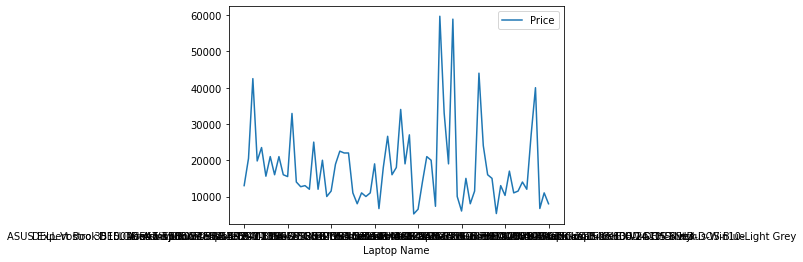

In [11]:
dflaptops.plot(x='Laptop Name',y='Price')

In [10]:
dflaptops.columns

Index(['Laptop Name', 'Price', 'Laptop Link'], dtype='object')